In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from  sklearn.naive_bayes import GaussianNB

In [22]:
mega = pd.read_csv("all_2.csv")

In [58]:
mega

,Transport,Cars,Petrol,Transport Percent Change,Cars Percent Change,Petrol Percent Change,Category A Population,Category B Population,Category A Registration,Category B Registration,...,Net Demand,Sucess Rate,Category_Cat A (Cars up to 1600cc and 97kW),Category_Cat B (Cars above 1600cc or 97kW),Category_Cat C (Goods vehicles and buses),Category_Cat D (Motorcycles),Category_Cat E (Open),day,month,year
1310,102.524,0.000,0.000,0.011155,-1.000000,-1.000000,341686.0,279605.0,733.0,1295.0,...,207,63.240418,1,0,0,0,0,1,12,2013
1311,102.524,0.000,0.000,0.011155,-1.000000,-1.000000,341686.0,279605.0,733.0,1295.0,...,123,71.400000,0,1,0,0,0,1,12,2013
1312,102.524,0.000,0.000,0.011155,-1.000000,-1.000000,341686.0,279605.0,733.0,1295.0,...,156,73.676471,0,0,0,1,0,1,12,2013
1313,102.524,0.000,0.000,0.011155,-1.000000,-1.000000,341686.0,279605.0,733.0,1295.0,...,75,75.739645,0,0,1,0,0,1,12,2013
1314,102.524,0.000,0.000,0.011155,-1.000000,-1.000000,341686.0,279605.0,733.0,1295.0,...,107,71.466667,0,0,0,0,1,1,12,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,111.217,121.562,114.945,-0.026095,-0.038853,-0.016252,321252.0,322216.0,1470.0,1472.0,...,261,75.394615,1,0,0,0,0,1,10,2021
2216,111.217,121.562,114.945,-0.026095,-0.038853,-0.016252,321252.0,322216.0,1470.0,1472.0,...,356,68.495575,0,1,0,0,0,1,10,2021
2217,111.217,121.562,114.945,-0.026095,-0.038853,-0.016252,321252.0,322216.0,1470.0,1472.0,...,108,52.789700,0,0,1,0,0,1,10,2021
2218,111.217,121.562,114.945,-0.026095,-0.038853,-0.016252,321252.0,322216.0,1470.0,1472.0,...,189,69.194313,0,0,0,1,0,1,10,2021


In [25]:
mega = mega.drop("Unnamed: 0",axis=1)
mega = mega.drop("index", axis=1)
mega = mega.drop("Date", axis=1)
mega

KeyError: "['Unnamed: 0'] not found in axis"

In [57]:
def xgb(data):
    labels = np.array(data['Quota Premium'])
    features = data.drop('Quota Premium',axis=1)
    feature_list = list(features.columns)
    features = np.array(features)
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25)
    dtree = XGBRegressor(verbosity=0)
    dtree.fit(train_features, train_labels)
    print("done fitting")
    predictions = dtree.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * (errors / test_labels)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')
    rmse = mean_squared_error(test_labels,predictions)**(1/2.0)
    return rmse
xgb(mega)

done fitting
Accuracy: 93.72 %.


3291.6818844040404

In [50]:
x = []
rmse = []
for i in range(1,1000,100):
    x.append(i)
    rmse.append(xgb(mega,i))
    print(i)
    i+=1

[23:46:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
done fitting


XGBoostError: [23:46:07] c:\users\administrator\workspace\xgboost-win64_release_1.5.1\src\c_api\c_api_utils.h:161: Invalid missing value: null

In [12]:
xgb.XGBRegressor(n_estimators=100,reg_lambda=1,gamma=0,max_depth=3)

AttributeError: 'function' object has no attribute 'XGBRegressor'

In [21]:
mega

,Category,Quota,Quota Premium,Total Bids Received,Number of Successful Bids,Net Demand,Sucess Rate,Category A Population,Category B Population,Category A Registration,Category B Registration,Category A Deregistration,Category B Deregistration,CAT_A Net Change,CAT_B Net Change
0,Cat A (Cars up to 1600cc and 97kW),1342,$28489,2153,1335,811,62.006503,267646.0,137656.0,4297.0,3064.0,4490.0,1995.0,-4.491506,34.889034
1,Cat B (Cars above 1600cc or 97kW),707,$29099,1128,707,421,62.677305,267646.0,137656.0,4297.0,3064.0,4490.0,1995.0,-4.491506,34.889034
2,Cat C (Goods vehicles and buses),577,$13101,1017,566,440,55.653884,267646.0,137656.0,4297.0,3064.0,4490.0,1995.0,-4.491506,34.889034
3,Cat D (Motorcycles),840,$1,795,795,-45,100.000000,267646.0,137656.0,4297.0,3064.0,4490.0,1995.0,-4.491506,34.889034
4,Cat E (Open),1094,$29001,1645,1094,551,66.504559,267646.0,137656.0,4297.0,3064.0,4490.0,1995.0,-4.491506,34.889034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315,Cat A (Cars up to 1600cc and 97kW),978,$40714,1620,978,642,60.370370,319137.0,314417.0,1291.0,2614.0,1425.0,1590.0,-10.379551,39.173680
2316,Cat B (Cars above 1600cc or 97kW),1035,$45012,1712,1019,677,59.521028,319137.0,314417.0,1291.0,2614.0,1425.0,1590.0,-10.379551,39.173680
2317,Cat C (Goods vehicles and buses),368,$32889,599,363,231,60.601002,319137.0,314417.0,1291.0,2614.0,1425.0,1590.0,-10.379551,39.173680
2318,Cat D (Motorcycles),526,$7670,767,522,241,68.057366,319137.0,314417.0,1291.0,2614.0,1425.0,1590.0,-10.379551,39.173680


In [26]:
mega = mega.drop("index", axis=1)
mega = mega.drop("Date", axis=1)
mega

,Transport,Cars,Petrol,Transport Percent Change,Cars Percent Change,Petrol Percent Change,Category A Population,Category B Population,Category A Registration,Category B Registration,...,Net Demand,Sucess Rate,Category_Cat A (Cars up to 1600cc and 97kW),Category_Cat B (Cars above 1600cc or 97kW),Category_Cat C (Goods vehicles and buses),Category_Cat D (Motorcycles),Category_Cat E (Open),day,month,year
0,75.128,0.000,0.000,-0.003819,NaN,NaN,267646.0,137656.0,4297.0,3064.0,...,811,62.006503,1,0,0,0,0,1,1,2003
1,75.128,0.000,0.000,-0.003819,NaN,NaN,267646.0,137656.0,4297.0,3064.0,...,421,62.677305,0,1,0,0,0,1,1,2003
2,75.128,0.000,0.000,-0.003819,NaN,NaN,267646.0,137656.0,4297.0,3064.0,...,440,55.653884,0,0,1,0,0,1,1,2003
3,75.128,0.000,0.000,-0.003819,NaN,NaN,267646.0,137656.0,4297.0,3064.0,...,-45,100.000000,0,0,0,1,0,1,1,2003
4,75.128,0.000,0.000,-0.003819,NaN,NaN,267646.0,137656.0,4297.0,3064.0,...,551,66.504559,0,0,0,0,1,1,1,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,111.217,121.562,114.945,-0.026095,-0.038853,-0.016252,321252.0,322216.0,1470.0,1472.0,...,261,75.394615,1,0,0,0,0,1,10,2021
2216,111.217,121.562,114.945,-0.026095,-0.038853,-0.016252,321252.0,322216.0,1470.0,1472.0,...,356,68.495575,0,1,0,0,0,1,10,2021
2217,111.217,121.562,114.945,-0.026095,-0.038853,-0.016252,321252.0,322216.0,1470.0,1472.0,...,108,52.789700,0,0,1,0,0,1,10,2021
2218,111.217,121.562,114.945,-0.026095,-0.038853,-0.016252,321252.0,322216.0,1470.0,1472.0,...,189,69.194313,0,0,0,1,0,1,10,2021


In [34]:
def forest(data, n):
    labels = np.array(data['Quota Premium'])
    features = data.drop('Quota Premium',axis=1)
    feature_list = list(features.columns)
    features = np.array(features)
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25)
    rf = RandomForestRegressor(n_estimators = 1000, random_state = n)
    rf.fit(train_features, train_labels)
    print("done fitting")
    predictions = rf.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * (errors / test_labels)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')
    rmse = mean_squared_error(test_labels,predictions)
    return accuracy, rmse

In [39]:
forest(mega,1000)

done fitting
Accuracy: 94.89 %.


(94.8936499290664, 7617402.1156211635)

In [36]:
mega = mega.dropna()

In [64]:
def NB(data):
    labels = np.array(data['Quota Premium'])
    features = data.drop('Quota Premium',axis=1)
    feature_list = list(features.columns)
    features = np.array(features)
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25)
    nb = GaussianNB()
    nb.fit(train_features, train_labels)
    print("done fitting")
    predictions = nb.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * (errors / test_labels)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')
    rmse = mean_squared_error(test_labels,predictions)
    return accuracy, rmse

In [65]:
NB(mega)

done fitting
Accuracy: 22.05 %.


(22.045288368202336, 379540470.8815789)

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler # Standardization
from sklearn.ensemble import IsolationForest # Outlier Detection
from keras.models import Sequential # Sequential Neural Network
from keras.layers import Dense
from keras.callbacks import EarlyStopping # Early Stopping Callback
from keras.optimizers import Adam # Optimizer
from kerastuner.tuners import RandomSearch # HyperParameter Tuning
import warnings
warnings.filterwarnings('ignore')

ImportError: cannot import name 'Adam' from 'keras.optimizers' (c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\keras\optimizers.py)

In [67]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25)

NameError: name 'features' is not defined

In [70]:
labels = np.array(mega['Quota Premium'])
features = mega.drop('Quota Premium',axis=1)
feature_list = list(features.columns)
features = np.array(features)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25)

In [71]:
from sklearn import preprocessing

In [72]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(features)


In [73]:
X_scale

array([[0.45133805, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.45133805, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.45133805, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 0.81818182,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.81818182,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.81818182,
        1.        ]])

In [89]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, labels, test_size=0.3)

In [90]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)


 

 


In [91]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(637, 27) (136, 27) (137, 27) (637,) (136,) (137,)


In [101]:
# mlp for regression with mse loss function
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

In [110]:
model = Sequential()
model.add(Dense(25, input_dim=27, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])

In [132]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=1000, verbose=0)


In [133]:
train_mse = model.evaluate(X_train, Y_train, verbose=0)

In [134]:
test_mse = model.evaluate(X_test, Y_test, verbose=0)
print((train_mse, test_mse))

([0.8348970413208008, 656200256.0], [0.781426727771759, 758873280.0])


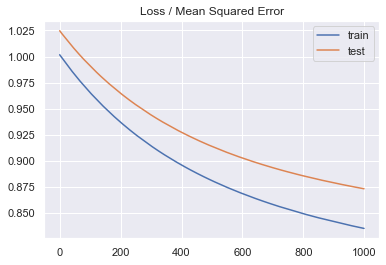

In [135]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [120]:
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])

In [121]:
history

In [122]:
model.evaluate(X_test, Y_test, verbose=0)

[2.6522369384765625, 1627451520.0]

In [136]:
model.predict(X_test)

array([[25091.98 ],
       [24542.508],
       [23270.252],
       [26497.574],
       [24502.32 ],
       [25707.209],
       [25934.96 ],
       [24914.818],
       [26465.207],
       [26787.992],
       [26143.37 ],
       [23640.293],
       [25223.525],
       [28340.648],
       [27836.273],
       [23457.863],
       [22675.725],
       [27046.645],
       [25057.646],
       [22104.557],
       [27830.447],
       [22191.686],
       [26817.568],
       [24568.154],
       [26757.416],
       [25517.572],
       [26835.602],
       [25236.889],
       [23633.648],
       [26267.584],
       [27170.297],
       [26536.906],
       [23463.01 ],
       [22838.127],
       [26726.996],
       [24149.766],
       [26175.648],
       [27534.932],
       [25216.873],
       [26595.146],
       [26655.352],
       [21928.863],
       [23927.87 ],
       [22605.16 ],
       [27585.492],
       [26954.502],
       [22652.084],
       [26029.014],
       [26140.52 ],
       [24867.467],
